<a href="https://colab.research.google.com/github/adewunmi2/AdvancedDataAnalytics2024AutumnNew/blob/main/SHAP_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# install shap for our notebook
!pip install shap

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:17:21] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [12:17:22] WARNING: /workspace/src/common/error_msg.cc:27: The tree method `gpu_hist` is deprecated since 2.0.0. To use GPU training, set the `device` parameter to CUDA instead.

    E.g. tree_method = "hist", device = "cuda"

  warnings.warn(smsg, UserWarning)


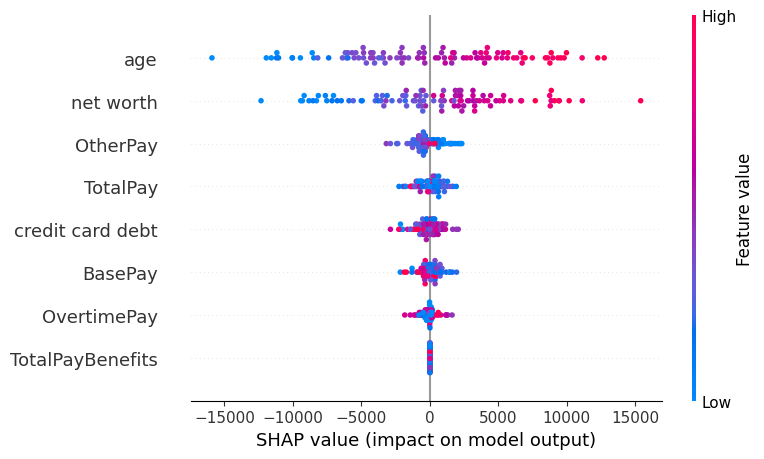

Feature Importances using SHAP:
            Feature   Importance
0               age  5236.109863
1           BasePay   523.882202
2       OvertimePay   340.522583
3          OtherPay   818.260681
4          TotalPay   664.755920
5  TotalPayBenefits     0.000000
6  credit card debt   652.442017
7         net worth  4212.282227


In [5]:
import shap
import xgboost as xgb
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

# load data
df = pd.read_csv("/content/drive/MyDrive/DeepLearningCourse2024/car_purchasingNew.csv", encoding='ISO-8859-1')

# handle these better with your own dataset, here we are simply dropping these
df = df.drop(['customer name', 'JobTitle', 'customer e-mail', 'country', 'gender', 'Benefits'], axis=1)

# Define features and target
X = df[['age', 'BasePay', 'OvertimePay', 'OtherPay', 'TotalPay',
       'TotalPayBenefits', 'credit card debt', 'net worth']]

y = df['car purchase amount']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# use GPU-enabled XGBoost Regressor
model = xgb.XGBRegressor(tree_method='gpu_hist')
model.fit(X_train, y_train)

# Initialize SHAP explainer
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

# Plot SHAP summary
shap.summary_plot(shap_values, X_test)

# Feature importance using SHAP values
importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': np.mean(np.abs(shap_values.values), axis=0)  # shap_values.values for the matrix
})

print("Feature Importances using SHAP:")
print(importance)